In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import graphviz

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import KFold

warnings.filterwarnings('ignore')

np.random.seed(42)

%matplotlib inline
sns.set_style('darkgrid')

In [2]:
X = np.random.randn(20,500)
y = scipy.stats.bernoulli.rvs(0.5,size=20)

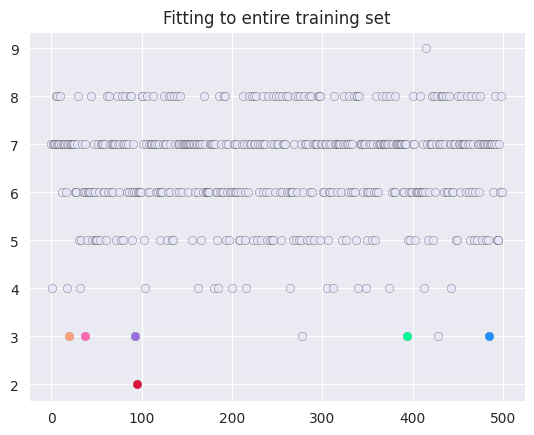

In [3]:
p_score = np.zeros(500)
best_split_vals = np.zeros(500)

for p in range(500):
    cur_x = X[:,p]
    best_split = cur_x[0]
    best_correct_num = max(sum((cur_x < best_split) == y), len(y)-sum((cur_x < best_split) == y))

    for i in range(1,len(cur_x)):
        split = cur_x[i]
        correct_num = max(sum((cur_x < split) == y), len(y)-sum((cur_x < split) == y))

        if best_correct_num < correct_num:
            best_split = split
            best_correct_num = correct_num

    p_score[p] = best_correct_num
    best_split_vals[p] = best_split

err = 20 - p_score
min_6_idxs = np.argsort(err)[:6]
colors = ["#DC143C", "#FF69B4", "#9370DB", "#00FA9A", "#1E90FF", "#FFA07A"]

plt.scatter(np.arange(500), err, linewidths=0.2, color = "#E6E6FA", edgecolors = "black", alpha = 0.8)
for i in range(6):
    idx = min_6_idxs[i]
    plt.scatter(idx, err[idx],color=colors[i], linewidths=0.2)

plt.title("Fitting to entire training set")

plt.show()

In [4]:
min_6_idxs

array([ 95,  38,  93, 394, 485,  20])

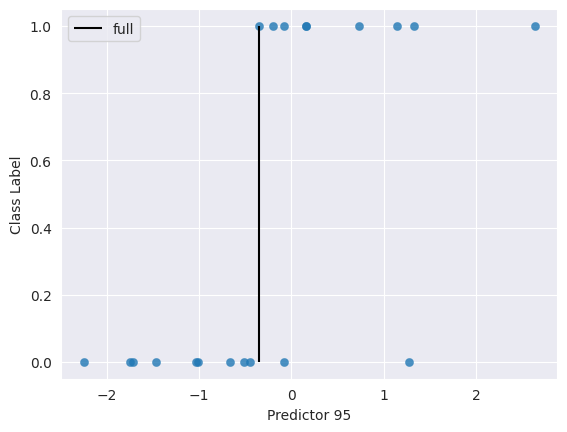

In [5]:
min_idx = np.argsort(err)[0]
plt.scatter(X[:,min_idx],y, linewidths=0.2, alpha=0.8)
plt.vlines(best_split_vals[min_idx], 0, 1,label='full', color='black')
plt.legend()
plt.xlabel("Predictor 95")
plt.ylabel("Class Label")
plt.show()

In [6]:
kf = KFold(n_splits=5)
p_scores_train = np.zeros((500,5))
p_scores_test = np.zeros((500,5))
best_split_vals_cv = np.zeros((500,5))
k = 0

for train_idxs, test_idxs in kf.split(X):
    print(train_idxs, test_idxs)
    X_train, X_test  = X[train_idxs], X[test_idxs]
    y_train, y_test = y[train_idxs], y[test_idxs]

    for p in range(500):
        cur_x_train, cur_x_test = X_train[:,p], X_test[:,p]
        best_split = cur_x_train[0]
        best_correct_num_train = max(sum((cur_x_train < best_split) == y_train), len(y_train)-sum((cur_x_train < best_split) == y_train))

        for i in range(1,len(cur_x_train)):
            split = cur_x_train[i]
            correct_num_train = max(sum((cur_x_train < split) == y_train), len(y_train)-sum((cur_x_train < split) == y_train))

            if best_correct_num_train < correct_num_train:
                best_split = split
                best_correct_num_train = correct_num_train
                best_correct_num_test= max(sum((cur_x_test < split) == y_test), len(y_test)-sum((cur_x_test < split) == y_test))

        p_scores_train[p, k] = best_correct_num_train
        p_scores_test[p, k] = best_correct_num_test
        best_split_vals_cv[p, k] = best_split

    k += 1


[ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [0 1 2 3]
[ 0  1  2  3  8  9 10 11 12 13 14 15 16 17 18 19] [4 5 6 7]
[ 0  1  2  3  4  5  6  7 12 13 14 15 16 17 18 19] [ 8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 16 17 18 19] [12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] [16 17 18 19]


In [7]:
# [ 0  1  2  3  4  5  6  7 12 13 14 15 16 17 18 19] [ 8  9 10 11] case
# best idx in fully traning
a = [i for i in range(20)]
b = [8,9,10,11]

new_idx = [x for x in a if (x not in b)]
new_idx
cur_x = X[new_idx, min_idx]
best_split = cur_x[0]
best_correct_num = max(sum((cur_x < best_split) == y[new_idx]), len(y[new_idx])-sum((cur_x < best_split) == y[new_idx]))

for i in range(1,len(cur_x)):
    split = cur_x[i]
    correct_num = max(sum((cur_x < split) == y[new_idx]), len(y[new_idx])-sum((cur_x < split) == y[new_idx]))

    if best_correct_num < correct_num:
        best_split = split
        best_correct_num = correct_num

best_split

-0.07576428653545988

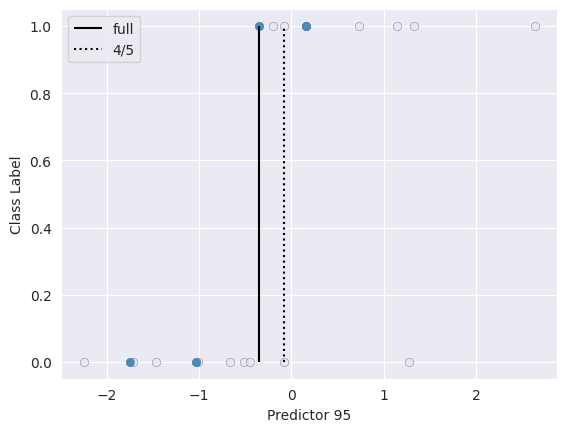

In [8]:
plt.scatter(X[:,min_idx],y, linewidths=0.2, color = "#E6E6FA", edgecolors = "black", alpha=0.8)
plt.scatter(X[8:12,min_idx],y[8:12], linewidths=0.2, alpha=0.8)
plt.vlines(best_split_vals[min_idx], 0, 1,label='full', color='black')
plt.vlines(best_split, 0, 1, label="4/5", linestyles='dotted', color='black')
plt.legend()
plt.xlabel("Predictor 95")
plt.ylabel("Class Label")
plt.show()

In [9]:
err_train = 16 - p_scores_train
err_test = 4 - p_scores_test

print("Full-training data:", min_6_idxs)
print("5-Fold CV in training:", np.argsort(np.sum(err_train,axis=1))[:6])
print("5-Fold CV in test:", np.argsort(np.sum(err_test,axis=1))[:6])

Full-training data: [ 95  38  93 394 485  20]
5-Fold CV in training: [ 95 428 394 485  38 278]
5-Fold CV in test: [219 119 299 415 326 464]


In [10]:
df = pd.DataFrame({'x': err_train.flatten(), 'y': err_test.flatten()})

counts = df.groupby(['x', 'y']).size().reset_index(name='counts')
counts['cum'] = counts.x + counts.y
counts

,x,y,counts,cum
0,1.0,1.0,4,2.0
1,1.0,2.0,2,3.0
2,2.0,0.0,5,2.0
3,2.0,1.0,28,3.0
4,2.0,2.0,12,4.0
5,3.0,0.0,26,3.0
6,3.0,1.0,102,4.0
7,3.0,2.0,81,5.0
8,4.0,0.0,68,4.0
9,4.0,1.0,311,5.0


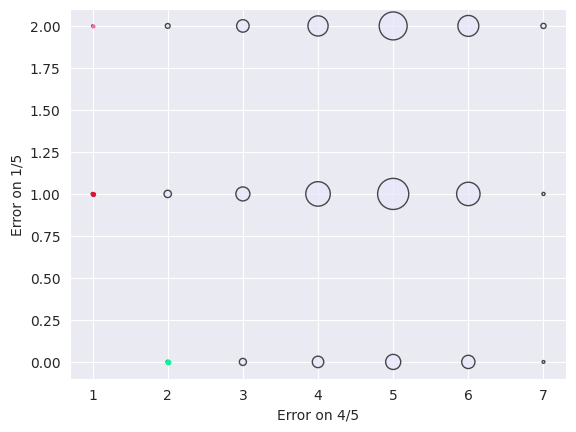

In [11]:
plt.scatter(counts['x'], counts['y'], s=counts['counts'], color = "#E6E6FA", edgecolors = "black", alpha = 0.7)

colors = ["#DC143C", "#FF69B4", "#00FA9A"]

for i in range(3):
    plt.scatter(counts.iloc[i,:]['x'], counts.iloc[i,:]['y'],s=counts.iloc[i,:]['counts']*2, color=colors[i])



plt.xlabel('Error on 4/5')
plt.ylabel('Error on 1/5')
plt.show()